c:\Users\Bruna\Documents\repos\oil_spill_segmentation\oil_segmentation_env\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


Authenticated using refresh token.
bbox {'west': 30.6571191353999, 'south': 34.5242413818581, 'east': 30.819609981891, 'north': 34.6599084062484}
DataCube(<PGNode 'load_collection' at 0x1d16e08d0e0>) s1_image_original
0:00:00 Job 'j-2508271115174f8e9c8406b5273e9f90': send 'start'
0:00:13 Job 'j-2508271115174f8e9c8406b5273e9f90': created (progress 0%)
0:00:19 Job 'j-2508271115174f8e9c8406b5273e9f90': created (progress 0%)
0:00:25 Job 'j-2508271115174f8e9c8406b5273e9f90': created (progress 0%)
0:00:33 Job 'j-2508271115174f8e9c8406b5273e9f90': created (progress 0%)
0:00:43 Job 'j-2508271115174f8e9c8406b5273e9f90': created (progress 0%)
0:00:56 Job 'j-2508271115174f8e9c8406b5273e9f90': running (progress N/A)
0:01:11 Job 'j-2508271115174f8e9c8406b5273e9f90': running (progress N/A)
0:01:30 Job 'j-2508271115174f8e9c8406b5273e9f90': running (progress N/A)
0:01:54 Job 'j-2508271115174f8e9c8406b5273e9f90': running (progress N/A)
0:02:25 Job 'j-2508271115174f8e9c8406b5273e9f90': finished (progres

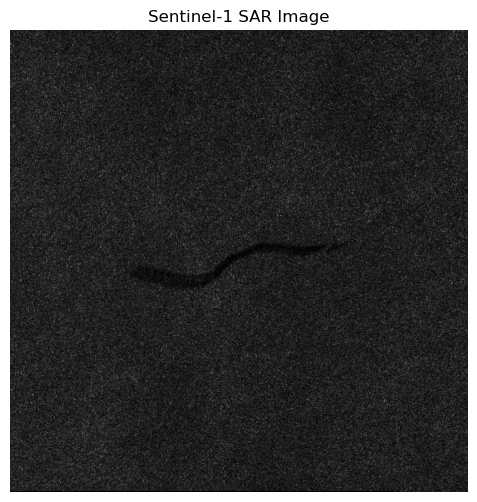

In [1]:
import sys
import os
import openeo
sys.path.append(os.path.abspath(".."))
from scripts.download_SAR_image import run_download
from scripts.get_unique_path import get_unique_path

# Connect and authenticate to Copernicus Data Space openEO backend
connection = openeo.connect("openeo.dataspace.copernicus.eu").authenticate_oidc()

coordinates = [
    [30.8196099818910, 34.6394114039040],
    [30.6825780330998, 34.6599084062484],
    [30.6571191353999, 34.5447383842024],
    [30.7941510841911, 34.5242413818581],
    [30.8196099818910, 34.6394114039040],
]

temporal_extent = ["2019-03-12", "2019-03-13"]

outputfile = "../outputs/1_Sentinel1_from_openEO.tif"

unique_output_path = get_unique_path(outputfile)

# 1. Download Sentinel-1 data
downloaded_file = run_download(coordinates, temporal_extent, unique_output_path, connection)


In [5]:
print(unique_output_path)

../outputs/1_Sentinel1_from_openEO_2.tif


✅ EO API image converted to dB and saved as ../outputs/2_Sentinel1_converted_dB_3.tif


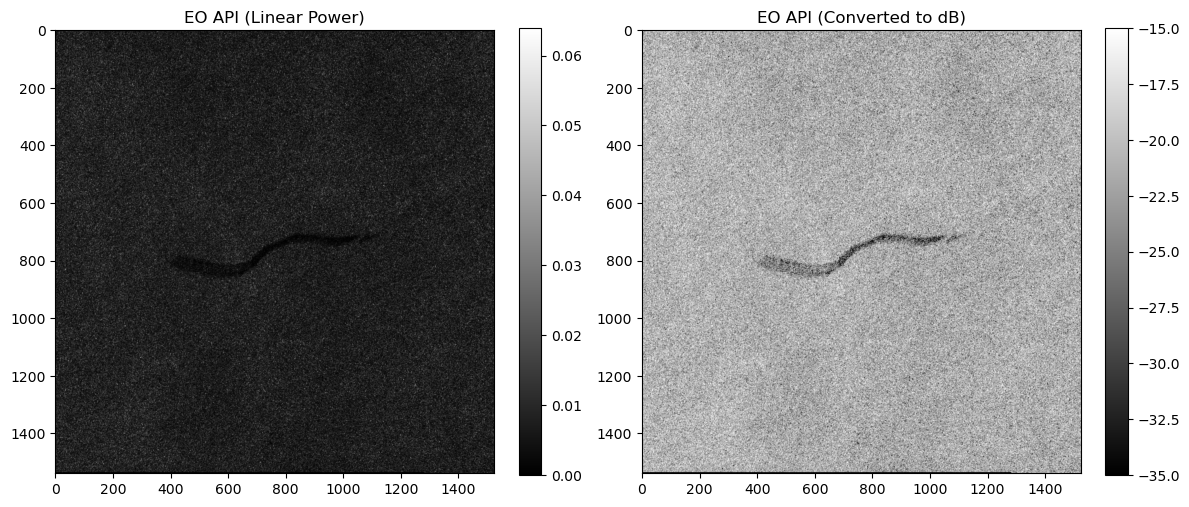

In [ ]:
# Add the project root (parent of "scripts") to sys.path
sys.path.append(os.path.abspath(".."))
from scripts.eoapi_preprocessor import EOAPIPreprocessor

preprocessed_output_file_path = "../outputs/2_Sentinel1_converted_dB.tif"  # output
unique_preprocessed_output_path = get_unique_path(preprocessed_output_file_path)

# Initialize preprocessor
preprocessor = EOAPIPreprocessor(unique_output_path, unique_preprocessed_output_path)

# Convert EO API image to dB
preprocessor.convert_to_db()

# Visualize before and after
preprocessor.visualize_conversion()



✅ Saved segmented mask to: ../outputs\georeferenced_segmentation_mask_2.tif
✅ Saved polygons to: ../outputs\georreferenced_segmentation.geojson


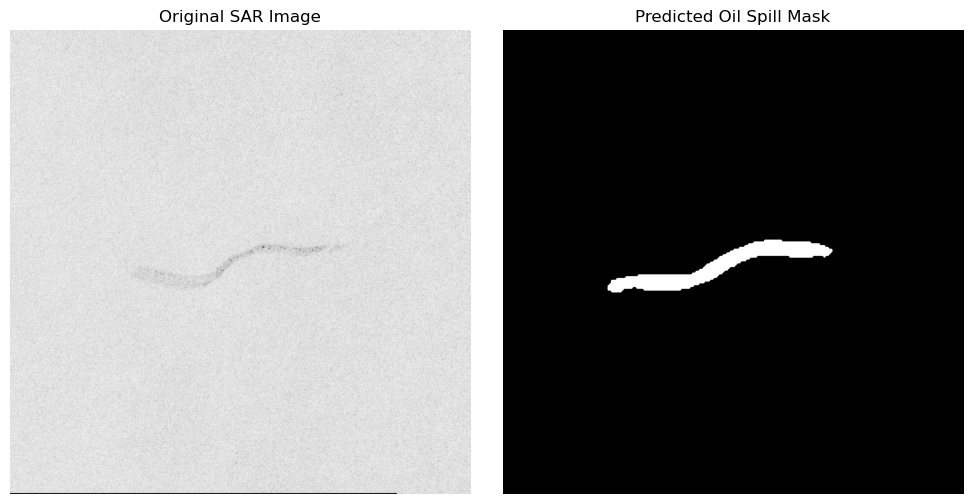

In [ ]:
from scripts.inference import run_inference
# 3. Run inference

# in case of changing something in inference code, 
# it's possible to run the above code to update the source without need of restart the kernel:

# %run -i "../scripts/inference.py"

# choose the model
model_name = "deeplabv3"   # options: "deeplabv3", "fpn", "pan"
results = run_inference(unique_preprocessed_output_path, model_name, "../outputs")